In [34]:
import numpy as np
from scipy.stats import entropy
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from re import findall, finditer
from IPython.display import Image, display_png

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> utiliza la librería Pandas de Python para crear un objeto de tipo DataFrame llamado "tabla". El objeto DataFrame se crea con 6 filas y 2 columnas, donde las columnas se llaman "Presion" y "Clase".

La primera línea del código inicializa el DataFrame con las columnas "Presion" y "Clase" y la función "np.arange(6)" crea un índice numérico para las filas del DataFrame.

La segunda línea asigna los valores de presión a la columna "Presion" y los valores de clase a la columna "Clase". En este caso, los valores de presión son [40, 48, 60, 72, 80, 90] y los valores de clase son ['+', '+', '-', '-', '-', '+'].</div>

In [35]:
tabla = pd.DataFrame(columns = ['Presion','Clase'], index = np.arange(6))
tabla.Presion = [40, 48, 60, 72, 80, 90]
tabla.Clase = ['+', '+', '-', '-', '-', '+']
tabla

,Presion,Clase
0,40,+
1,48,+
2,60,-
3,72,-
4,80,-
5,90,+


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> se llama al método "value_counts()" en la columna "Clase" del DataFrame "tabla" y devuelve una serie que muestra la proporción de veces que aparece cada valor único en la columna "Clase".</div>

In [36]:
tabla.Clase.value_counts(normalize=True)

+    0.5
-    0.5
Name: Clase, dtype: float64

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> calcula la entropía de la columna "Clase" del DataFrame "tabla" utilizando la función "entropy()" de la librería Scipy.</div>

In [37]:
H = entropy(tabla.Clase.value_counts(normalize = True), base = 2)
H

1.0

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> crea un ataFrame "tabla1" con dos columnas, "Presion" y "Clase", donde los valores de la columna "Presion" han sido discretizados utilizando el bin [(48 + 60) / 2] y se ha asignado una nueva categoría a cada valor de la columna.</div>

In [38]:
tabla1 = tabla
tabla1.Presion = np.digitize(tabla.Presion, bins = [(48 + 60) / 2])
tabla1

,Presion,Clase
0,0,+
1,0,+
2,1,-
3,1,-
4,1,-
5,1,+


<div class="alert alert-block alert-success">
<b>En el siguiente código:</b> Para cada valor único de la columna "Presion" en "tabla1", el código crea un nuevo DataFrame llamado "Class1" que contiene solo las filas del DataFrame "tabla1" donde la columna "Presion" es igual a ese valor. Luego, el código calcula la entropía de la columna "Clase" en este nuevo DataFrame "Class1" y resta el resultado de la entropía de "Class1" ponderada por la proporción de filas en "Class1" en relación al total de filas en "tabla1". Esto se hace para cada valor único de la columna "Presion" en "tabla1".</div>

In [39]:
l1 = len(tabla1)
G1 = H
for v in tabla1.Presion.unique():
    Class1 = tabla1.loc[tabla.Presion == v]
    G1 -= (len(Class1)/l1)*entropy(Class1.iloc[:, -1].value_counts(normalize=True), base = 2)
G1

0.4591479170272448

In [40]:
tabla.Presion = [40, 48, 60, 72, 80, 90]
tabla

,Presion,Clase
0,40,+
1,48,+
2,60,-
3,72,-
4,80,-
5,90,+


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> crea un ataFrame "tabla1" con dos columnas, "Presion" y "Clase", donde los valores de la columna "Presion" han sido discretizados utilizando el bin [(80 + 90) / 2] y se ha asignado una nueva categoría a cada valor de la columna.</div>

In [41]:
tabla2 = tabla
tabla2.Presion = np.digitize(tabla.Presion, bins = [(80 + 90) / 2])
tabla2

,Presion,Clase
0,0,+
1,0,+
2,0,-
3,0,-
4,0,-
5,1,+


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> se repite lo que se ha hecho anteriormente con tabla1</div>

In [42]:
l2 = len(tabla2)
G2 = H
for v in tabla2.Presion.unique():
    Class2 = tabla2.loc[tabla2.Presion == v]
    G2 -= (len(Class2) / l2) * entropy(Class2.iloc[:, -1].value_counts(normalize = True), base = 2)
G2

0.19087450462110933

In [43]:
tabla.Presion = [40, 48, 60, 72, 80, 90]
tabla

,Presion,Clase
0,40,+
1,48,+
2,60,-
3,72,-
4,80,-
5,90,+


<div class="alert alert-block alert-success">
<b>El siguiente código:</b> crea un clasificador de árbol de decisión que utilizará la ganancia de información basada en la entropía como medida de calidad de las divisiones, y tendrá como máximo 2 nodos hoja.</div>

In [44]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes=2)

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> ajusta el clasificador de árbol de decisión "clf" creado anteriormente a los datos de entrada. En particular, el clasificador se ajusta utilizando la función "fit()" de la librería scikit-learn.

La entrada de la función "fit()" son los datos de la columna "Presion" del DataFrame "tabla", que se convierten en un array numpy utilizando la función "np.array()". Además, la función "reshape()" se utiliza para cambiar la forma del array numpy a una matriz con una sola columna, ya que la función "fit()" espera una matriz de características en el formato (n_samples, n_features).</div>

In [45]:
clf.fit(np.array(tabla.Presion).reshape(-1, 1), tabla.Clase)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=2)

<div class="alert alert-block alert-success">
<b>El siguiente código:</b> utiliza la función "export_text()" de la librería scikit-learn para generar una representación en formato de texto del árbol de decisión ajustado por el clasificador "clf".</div>

In [46]:
txt = export_text(clf, feature_names=['Presion'])
print(txt)

|--- Presion <= 54.00
|   |--- class: +
|--- Presion >  54.00
|   |--- class: -



In [47]:
export_graphviz(decision_tree=clf, out_file='Presion.dot', class_names= tabla.Clase)

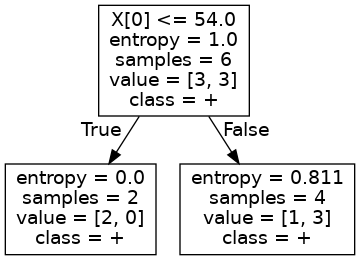

In [48]:
img = Image(filename='Presion.png')
display_png(img)

# SEGUNDA PARTE

Ejercicio 2.1

No se puede usar el algoritmo ID3 directamente en un conjunto de datos que contiene atributos con valores decimales, ya que estos son continuos y no discretos. Esto resulta en demasiados valores distintos para un solo atributo, lo que dificulta la construcción de un árbol de decisión. Se deben preprocesar los datos para convertir los atributos con valores decimales en atributos discretos antes de aplicar el algoritmo ID3. Los atributos que tienen valores decimales son: PRE4, PRE5 (racionales) y AGE(entero).

Ejercicio 2.2

In [49]:
f= open('thoracic_tree.txt')
contenido=f.read()
f.close()
contenido

'PRE9 = T\n|   PRE11 = T: T (2.0)\n|   PRE11 = F\n|   |   PRE6 = PRZ2\n|   |   |   DGN = DGN3: F (1.0)\n|   |   |   DGN = DGN2: T (0.0)\n|   |   |   DGN = DGN4: T (1.0)\n|   |   |   DGN = DGN6: T (0.0)\n|   |   |   DGN = DGN5: T (0.0)\n|   |   |   DGN = DGN8: T (0.0)\n|   |   |   DGN = DGN1: T (0.0)\n|   |   PRE6 = PRZ1\n|   |   |   PRE10 = T\n|   |   |   |   PRE7 = T\n|   |   |   |   |   PRE4 <= 3.58: F (1.0)\n|   |   |   |   |   PRE4 > 3.58: T (1.0)\n|   |   |   |   PRE7 = F\n|   |   |   |   |   PRE8 = T\n|   |   |   |   |   |   PRE14 = OC11: F (0.0)\n|   |   |   |   |   |   PRE14 = OC14: F (0.0)\n|   |   |   |   |   |   PRE14 = OC12\n|   |   |   |   |   |   |   PRE4 <= 3.88: F (3.0)\n|   |   |   |   |   |   |   PRE4 > 3.88: T (1.0)\n|   |   |   |   |   |   PRE14 = OC13: T (1.0)\n|   |   |   |   |   PRE8 = F: F (11.0)\n|   |   |   PRE10 = F: F (5.0)\n|   |   PRE6 = PRZ0\n|   |   |   PRE4 <= 4.28: T (3.0)\n|   |   |   PRE4 > 4.28: F (1.0)\nPRE9 = F\n|   PRE17 = T\n|   |   PRE25 = T: T

¿Se podría prescindir de algún atributo?

Sí, para determinar los atributos que son prescindibles, en Weka realizamos los siguientes pasos: primero, seleccionamos "Select attributes" en las opciones de arriba, y luego, en la pestaña correspondiente, elegimos "Choose (Attribute Evaluator)" y seleccionamos "InfoGainAttributeEval". Después, seleccionamos "Use full training set" y escogemos la clase "RiskYr" que es la variable que queremos clasificar. Finalmente, hacemos clic en "Start" y podemos observar en la sección "Ranked attributes" que hay tres atributos con una ganancia de información de 0: PRE4, PRE5 y AGE.

In [50]:
f= open('thoracic_tree2.txt')
contenido2=f.read()
f.close()
contenido2

'PRE9 = T\\n|   PRE11 = T: T (2.0)\\n|   PRE11 = F\\n|   |   PRE6 = PRZ2: T (2.0/1.0)\\n|   |   PRE6 = PRZ1\\n|   |   |   PRE10 = T\\n|   |   |   |   PRE7 = T: T (2.0/1.0)\\n|   |   |   |   PRE7 = F\\n|   |   |   |   |   PRE8 = T\\n|   |   |   |   |   |   DGN = DGN3: T (3.0/1.0)\\n|   |   |   |   |   |   DGN = DGN2: F (2.0)\\n|   |   |   |   |   |   DGN = DGN4: F (0.0)\\n|   |   |   |   |   |   DGN = DGN6: F (0.0)\\n|   |   |   |   |   |   DGN = DGN5: F (0.0)\\n|   |   |   |   |   |   DGN = DGN8: F (0.0)\\n|   |   |   |   |   |   DGN = DGN1: F (0.0)\\n|   |   |   |   |   PRE8 = F: F (11.0)\\n|   |   |   PRE10 = F: F (5.0)\\n|   |   PRE6 = PRZ0: T (4.0/1.0)\\nPRE9 = F\\n|   PRE17 = T\\n|   |   PRE8 = T: T (4.0/1.0)\\n|   |   PRE8 = F\\n|   |   |   PRE14 = OC11: F (10.0/1.0)\\n|   |   |   PRE14 = OC14: T (2.0/1.0)\\n|   |   |   PRE14 = OC12\\n|   |   |   |   PRE30 = T\\n|   |   |   |   |   PRE11 = T: T (3.0/1.0)\\n|   |   |   |   |   PRE11 = F: F (12.0/3.0)\\n|   |   |   |   PRE30 = F: F

In [51]:
tabla = pd.read_csv('ThoraricSurgery.csv')
tabla

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [52]:
#Buscamos los atributos no utilizados mediante el metodo find()
for atr in tabla.columns:
    if contenido.find(atr) == -1:
        print(atr, ": Atributo no utilizado")

id : Atributo no utilizado
Risk1Yr : Atributo no utilizado


Ejercicio 2.3

El algoritmo j48 ofrece resultados superiores al algoritmo id3 utilizado previamente debido a que utiliza una técnica diferente. En el caso del algoritmo id3, la discretización se realiza de antemano, lo que significa que no puede aprovechar los valores de la clase de destino para la clasificación, y además solo se puede utilizar una vez para la clasificación. En cambio, el algoritmo j48 utiliza una técnica de particionamiento binario y recursivo que utiliza la Ganancia de Información como medida de bondad. Esta técnica de particionamiento recursivo de atributos numéricos permite una clasificación más eficiente, ya que solo se produce cuando se maximiza la ganancia de información para dicha partición binaria.

Ejercicio 2.4

In [53]:
#Procedemos a implementar la discretización
Atrib_Num = [tabla.columns[i] for i in [2,3,16]]
Atrib_Num

['PRE4', 'PRE5', 'AGE']

In [54]:
#Solo hay 1 atributo que no se usa
for atributo in Atrib_Num:
    b = []
    for pos in finditer(atributo+' '+'<= ', contenido):
        #print (pos, pos.start(), pos.end())
        print (atributo+' '+'<= ', pos.start(), pos.end())
        if contenido[pos.end():].find(':') < contenido[pos.end():].find('\n'):
            segmento = contenido[pos.end():].find(':')
        else:
            segmento = contenido[pos.end():].find('\n')
            
        b.append(float(contenido[pos.end():pos.end()+segmento]))
        print(b[-1])
        b.sort()
    #print(atributo, b)
    tabla[atributo] = [chr(65+i) for i in np.digitize(tabla[atributo], bins=b)]

PRE4 <=  377 385
3.58
PRE4 <=  651 659
3.88
PRE4 <=  870 878
4.28
PRE4 <=  1440 1448
4.16
PRE4 <=  2031 2039
3.12
PRE4 <=  2551 2559
2.48
PRE4 <=  2698 2706
3.8
PRE4 <=  3197 3205
3.28
PRE4 <=  5192 5200
2.88
PRE4 <=  5253 5261
2.4
PRE4 <=  6196 6204
2.76
PRE4 <=  7347 7355
3.84
PRE4 <=  8589 8597
2.76
PRE4 <=  8810 8818
4.76
PRE5 <=  4380 4388
1.6
PRE5 <=  6102 6110
1.72
PRE5 <=  7077 7085
1.92
PRE5 <=  7863 7871
2.04
PRE5 <=  8031 8039
1.96
AGE <=  1162 1169
65.0
AGE <=  1398 1405
62.0
AGE <=  3044 3051
71.0
AGE <=  4292 4299
45.0
AGE <=  6502 6509
75.0
AGE <=  8422 8429
66.0


In [55]:
tabla.AGE.unique()

array(['B', 'F', 'E', 'G', 'C', 'D', 'A'], dtype=object)

In [56]:
tabla

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,F,F,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,B,F
1,2,DGN3,H,C,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,B,F
2,3,DGN3,E,F,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,B,F
3,4,DGN3,I,F,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,B,F
4,5,DGN3,B,A,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,F,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,L,F,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,C,F
466,467,DGN3,I,F,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,B,F
467,468,DGN3,F,F,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,B,F
468,469,DGN3,A,B,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,G,F


In [57]:
tabla.to_csv('ThoraricSurgery_2.csv', index=False)